In [1]:
!mkdir -p ~/.kaggle
!cp kaggle. json ~/ kaggle/

cp: target 'kaggle/' is not a directory


In [2]:
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 99% 162M/163M [00:01<00:00, 88.0MB/s]
100% 163M/163M [00:01<00:00, 98.7MB/s]


In [3]:
import zipfile
zf = zipfile.ZipFile('/content/face-mask-dataset.zip')
zf.extractall('/content')
zf.close()

In [4]:
import os
import shutil
import random
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16
from keras. layers import Dense, Conv2D,MaxPooling2D, Flatten, BatchNormalization , Dropout

In [5]:
import os
import shutil
import random
from sklearn.model_selection import train_test_split

base_dir = '/content/data'
train_dir = '/content/data/train'
test_dir = '/content/data/test'


os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)


for category in ['with_mask', 'without_mask']:
    os.makedirs(os.path.join(train_dir, category), exist_ok=True)
    os.makedirs(os.path.join(test_dir, category), exist_ok=True)

with_mask_images = os.listdir(os.path.join(base_dir, 'with_mask'))
without_mask_images = os.listdir(os.path.join(base_dir, 'without_mask'))


train_with_mask, test_with_mask = train_test_split(with_mask_images, test_size=0.2, random_state=42)
train_without_mask, test_without_mask = train_test_split(without_mask_images, test_size=0.2, random_state=42)

def move_files(file_list, source_dir, dest_dir):
    for file_name in file_list:
        source = os.path.join(source_dir, file_name)
        destination = os.path.join(dest_dir, file_name)
        shutil.move(source, destination)


move_files(train_with_mask, os.path.join(base_dir, 'with_mask'), os.path.join(train_dir, 'with_mask'))
move_files(test_with_mask, os.path.join(base_dir, 'with_mask'), os.path.join(test_dir, 'with_mask'))


move_files(train_without_mask, os.path.join(base_dir, 'without_mask'), os.path.join(train_dir, 'without_mask'))
move_files(test_without_mask, os.path.join(base_dir, 'without_mask'), os.path.join(test_dir, 'without_mask'))


In [24]:
cb = VGG16(
    weights = 'imagenet',
    include_top=False,
    input_shape=(150,150,3)

)
model = Sequential()
model.add(cb)
model.add(Flatten())
model.add(Dense(250,activation='relu'))
model.add(Dense(100,activation='relu')),
model.add(Dense(1,activation='sigmoid'))
cb.trainable=False
train = keras.utils.image_dataset_from_directory(
    directory ='/content/data/train',
    labels='inferred',
    label_mode ='int',
    batch_size=32,
    image_size=(150,150)
)
valid = keras.utils.image_dataset_from_directory(
    directory ='/content/data/test',
    labels='inferred',
    label_mode ='int',
    batch_size=32,
    image_size=(150,150)
)
def process(img, lab):
  img = tensorflow.cast(img/255. ,tensorflow.float32)
  return img, lab

train = train.map(process)
valid = valid.map(process)
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(train,epochs=10, validation_data = valid, callbacks=[early_stopping])


Found 6042 files belonging to 2 classes.
Found 1511 files belonging to 2 classes.
Epoch 1/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 41s 156ms/step - accuracy: 0.8857 - loss: 0.2723 - val_accuracy: 0.9788 - val_loss: 0.0598
Epoch 2/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 16s 85ms/step - accuracy: 0.9737 - loss: 0.0682 - val_accuracy: 0.9828 - val_loss: 0.0507
Epoch 3/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 20s 84ms/step - accuracy: 0.9829 - loss: 0.0414 - val_accuracy: 0.9841 - val_loss: 0.0522
Epoch 4/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 21s 86ms/step - accuracy: 0.9955 - loss: 0.0154 - val_accuracy: 0.9821 - val_loss: 0.0557
Epoch 5/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 17s 89ms/step - accuracy: 0.9929 - loss: 0.0184 - val_accuracy: 0.9848 - val_loss: 0.0508


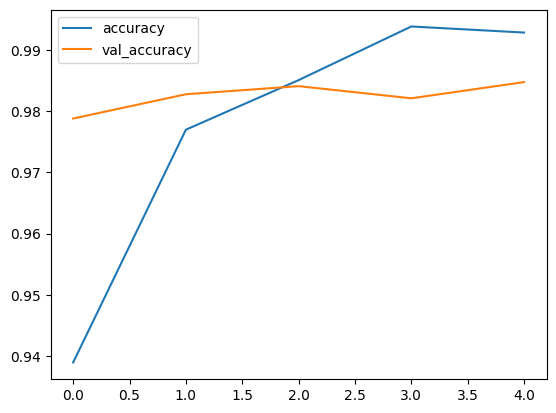

In [25]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()

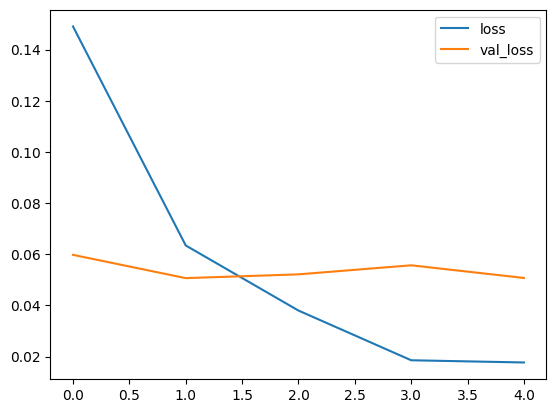

In [26]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

0 = 'Mask'
1 = 'Without_Mask'

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


array([[1.]], dtype=float32)

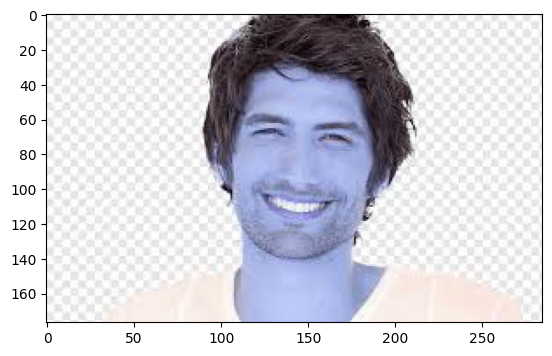

In [35]:
import cv2
import numpy as np
img1 = cv2.imread('/content/smile1.jpeg')
plt.imshow(img1)
img1 = cv2.resize(img1,(150,150))
test1 = img1.reshape((1,150,150,3))
prediction_prob1 = model.predict(test1)
prediction_prob1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


array([[0.]], dtype=float32)

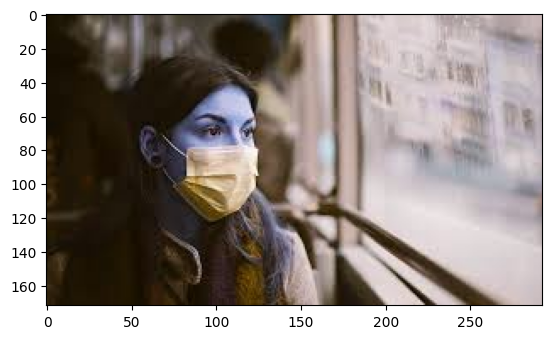

In [36]:
img2 = cv2.imread('/content/mask1.jpeg')
plt.imshow(img2)
img2 = cv2.resize(img2,(150,150))
test2 = img2.reshape((1,150,150,3))
prediction_prob1 = model.predict(test2)
prediction_prob1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


array([[1.4405962e-26]], dtype=float32)

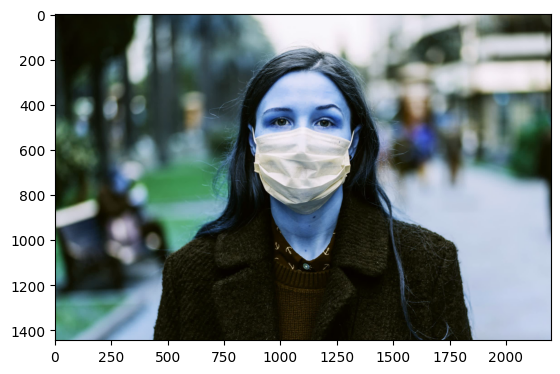

In [37]:
img2 = cv2.imread('/content/mask2.jpeg')
plt.imshow(img2)
img2 = cv2.resize(img2,(150,150))
test2 = img2.reshape((1,150,150,3))
prediction_prob1 = model.predict(test2)
prediction_prob1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


array([[0.]], dtype=float32)

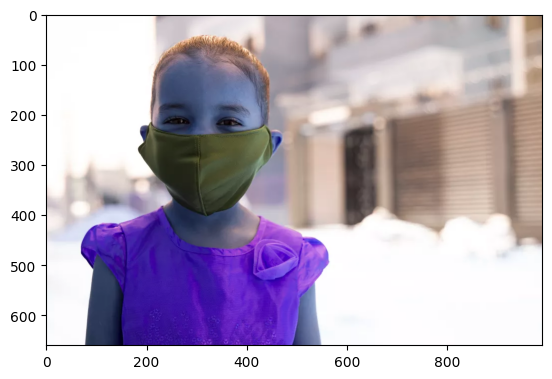

In [38]:
img2 = cv2.imread('/content/mask3.jpeg')
plt.imshow(img2)
img2 = cv2.resize(img2,(150,150))
test2 = img2.reshape((1,150,150,3))
prediction_prob1 = model.predict(test2)
prediction_prob1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


array([[1.]], dtype=float32)

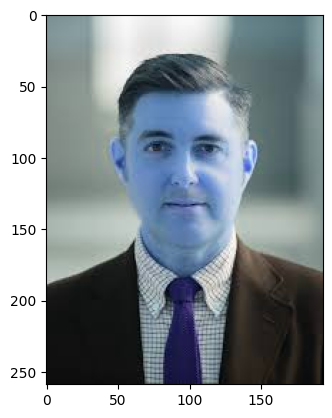

In [39]:
img2 = cv2.imread('/content/w_mask.jpeg')
plt.imshow(img2)
img2 = cv2.resize(img2,(150,150))
test2 = img2.reshape((1,150,150,3))
prediction_prob1 = model.predict(test2)
prediction_prob1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


array([[0.]], dtype=float32)

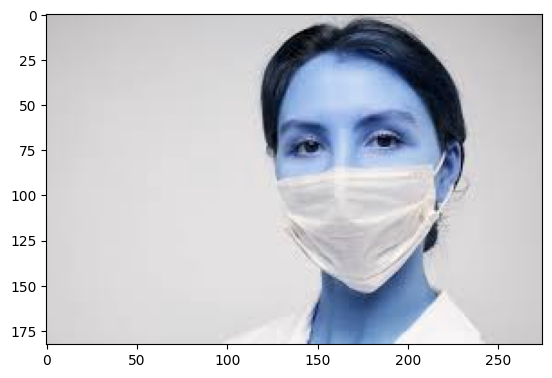

In [41]:
imgg = cv2.imread('/content/mask5.jpeg')
plt.imshow(imgg)
imgg = cv2.resize(imgg,(150,150))
testn = imgg.reshape((1,150,150,3))
prediction_prob10 = model.predict(testn)
prediction_prob10

In [42]:
from keras.models import load_model
model.save('MWM_model.h5')
from google.colab import files

# Download the saved model file
files.download('MWM_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [44]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 4, 4, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 250)                 │       2,048,250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          25,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,935,043 (79.86 MB)

 Trainable params: 2,073,451 (7.91 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 4,146,904 (15.82 MB)

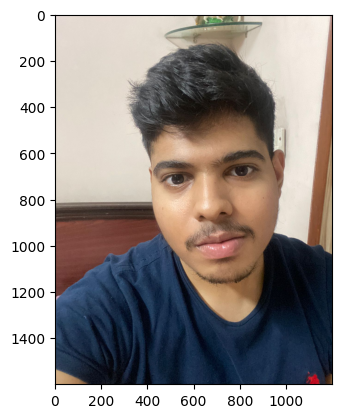

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Prediction: Without Mask


In [49]:
imgg = cv2.imread('/content/me.jpeg')
imgg = cv2.cvtColor(imgg, cv2.COLOR_BGR2RGB)
plt.imshow(imgg)
plt.show()


imgg = cv2.resize(imgg, (150, 150))
imgg = imgg / 255.0
testn = imgg.reshape((1, 150, 150, 3))


prediction_prob = model.predict(testn)
prediction = np.round(prediction_prob).astype(int)


if prediction[0][0] == 1:
    print("Prediction: Without Mask")
else:
    print("Prediction: With Mask")


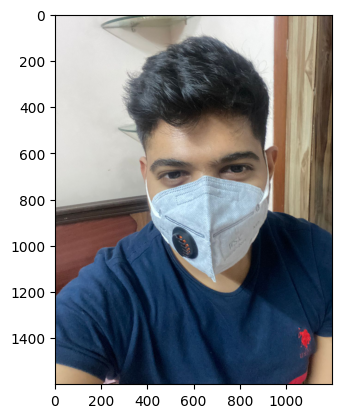

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 530ms/step
Prediction: With Mask


In [48]:
imgg = cv2.imread('/content/mem.jpeg')
imgg = cv2.cvtColor(imgg, cv2.COLOR_BGR2RGB)
plt.imshow(imgg)
plt.show()


imgg = cv2.resize(imgg, (150, 150))
imgg = imgg / 255.0
testn = imgg.reshape((1, 150, 150, 3))


prediction_prob = model.predict(testn)
prediction = np.round(prediction_prob).astype(int)


if prediction[0][0] == 1:
    print("Prediction: Without Mask")
else:
    print("Prediction: With Mask")
